In [1]:
import cv2
import numpy as np 
from matplotlib import pyplot as plt 
from detect_face import TransformImageToPassportSpecs

transformer = TransformImageToPassportSpecs("Germany")


2023-06-05 15:28:09.816464: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:107: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:109.)
  return torch._C._cuda_getDeviceCount() > 0


In [4]:
import os
import glob

def get_image_files(folder_path):
    image_files = []
    supported_extensions = ['.jpg', '.jpeg', '.png', '.gif']  # Add more extensions if needed

    # Search for files with supported image extensions in the folder
    for extension in supported_extensions:
        pattern = os.path.join(folder_path, f'*{extension}')
        image_files.extend(glob.glob(pattern))

    return image_files

# Specify the folder path where the images are located
folder_path = '/passport_photo/test_photos/'

# Get the image files in the specified folder
images = get_image_files(folder_path)

# Print the list of image files
for image in images:
    print(image)

/passport_photo/test_photos/_DSC6576.jpg
/passport_photo/test_photos/20210918_141651.jpg
/passport_photo/test_photos/20230331_183154.jpg
/passport_photo/test_photos/_DSC6469.jpg
/passport_photo/test_photos/20220806_173907.jpg
/passport_photo/test_photos/20220507_133135.jpg
/passport_photo/test_photos/20230318_121833.jpg
/passport_photo/test_photos/_DSC6540.jpg
/passport_photo/test_photos/IMG_7344.jpg
/passport_photo/test_photos/20210918_141553.jpg
/passport_photo/test_photos/_DSC6573.jpg
/passport_photo/test_photos/20230304_122258.jpg
/passport_photo/test_photos/_DSC6452.jpg
/passport_photo/test_photos/pic.jpg
/passport_photo/test_photos/Untitled.jpeg
/passport_photo/test_photos/child.png


/passport_photo/test_photos/_DSC6576.jpg
/passport_photo/test_photos/20210918_141651.jpg
/passport_photo/test_photos/20230331_183154.jpg
/passport_photo/test_photos/_DSC6469.jpg
/passport_photo/test_photos/20220806_173907.jpg
/passport_photo/test_photos/20220507_133135.jpg


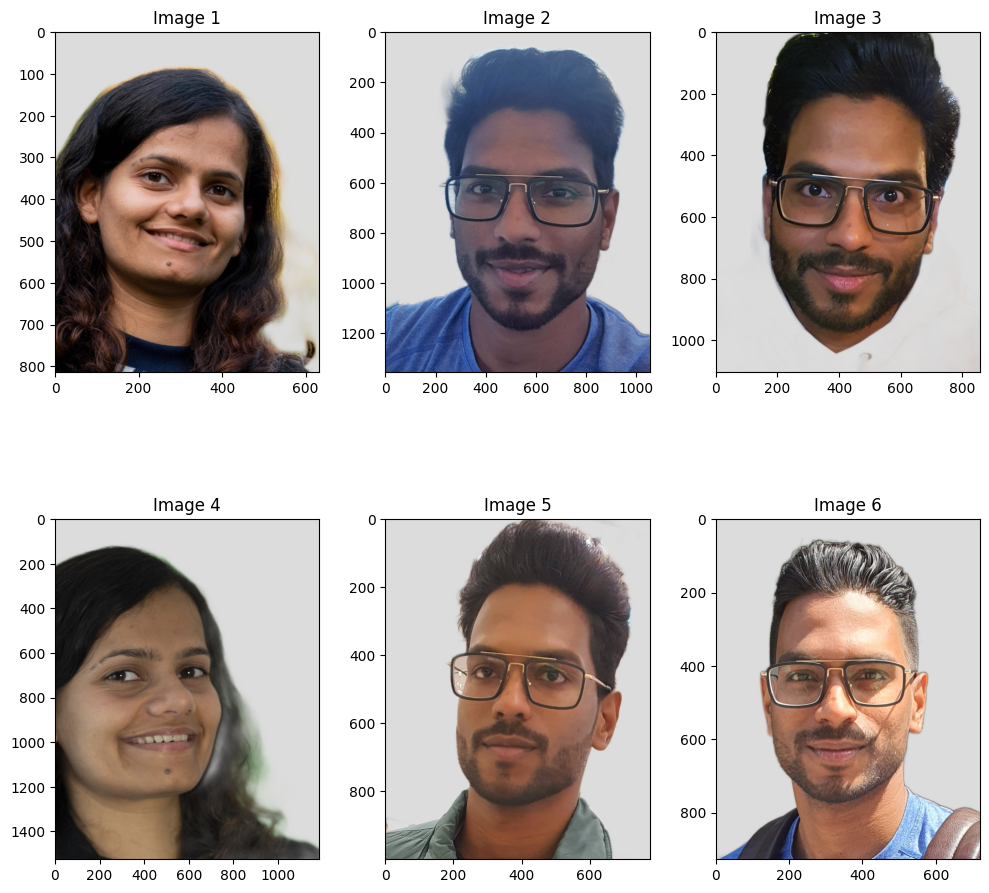

In [6]:
num_images = len(images)
num_cols = 3
num_rows = int(np.ceil(num_images / num_cols))
num_rows = 2
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(10, 10))
# output_path = "/passport_photo/images-output"

i = 0
for row in range(num_rows):
    for col in range(num_cols):
        if i< num_images:
            print(images[i])
            image = cv2.imread(images[i])
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)   
            transformed_image = transformer.transform(image)
            # transformed_image.save(output_path + f"/{i}.png")
            # cv2.imwrite(output_path + f"{i}.png", transformed_image)
            axes[row, col].imshow(transformed_image)
            axes[row, col].set_title(f'Image {i+1}')
            i += 1
            
plt.tight_layout()
plt.show()

In [ ]:
from PIL import Image
grey= (220, 220, 220)
background_image = Image.new("RGBA", (30, 30), grey)
background_image.save("/passport_photo/photos/backgrounds/grey.png")